<a href="https://colab.research.google.com/github/Promotion0622/IBA_DCX_Analytics_2.0/blob/main/IBA_DCX_Analytics_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. ↓아래 코드를 실행 후 '런타임' 클릭 ->'런타임 다시 시작'을 눌러주세요.**

In [ ]:
# @title
import warnings
warnings.filterwarnings('ignore')

total_tasks = 14
completed_tasks = 0

def print_progress():
    global completed_tasks
    completed_tasks += 1
    print(f"Complete: {100 * completed_tasks / total_tasks:.2f}%")

!sudo apt-get install -y fonts-nanum > /dev/null 2>&1
print_progress()

!sudo fc-cache -fv > /dev/null 2>&1
!rm ~/.cache/matplotlib -rf > /dev/null 2>&1
print_progress()

!pip install pandas > /dev/null 2>&1
print_progress()

!pip install JPype1==0.7.0 > /dev/null 2>&1
print_progress()

!pip install gensim==3.8.3 > /dev/null 2>&1
print_progress()

!pip install pyLDAvis==3.2.2 > /dev/null 2>&1
print_progress()

!pip install networkx > /dev/null 2>&1
print_progress()

!pip install --upgrade pip > /dev/null 2>&1
print_progress()

!pip install konlpy > /dev/null 2>&1
print_progress()

!pip install transformers > /dev/null 2>&1
print_progress()

!pip install prince > /dev/null 2>&1
print_progress()

!pip install squarify > /dev/null 2>&1
print_progress()

!pip install datasets > /dev/null 2>&1
print_progress()

!pip install adjustText > /dev/null 2>&1
print_progress()

print('런타임 다시 시작을 눌러주세요.')


Complete: 7.14%
Complete: 14.29%
Complete: 21.43%
Complete: 28.57%
Complete: 35.71%
Complete: 42.86%
Complete: 50.00%
Complete: 57.14%
Complete: 64.29%
Complete: 71.43%
Complete: 78.57%
Complete: 85.71%
Complete: 92.86%
Complete: 100.00%
런타임 다시 시작을 눌러주세요.


# **2. 분석할 지명을 입력해주세요(제주도 or 부산대)**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import nltk
from adjustText import adjust_text
nltk.download('punkt', quiet=True)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim as gensimvis
from konlpy.tag import Okt
from collections import defaultdict
import networkx as nx
import operator
from matplotlib import font_manager as fm
import requests
import matplotlib.font_manager as fm
from matplotlib import rc
from tqdm import tqdm
import os
from konlpy.tag import Mecab
from transformers import pipeline
from transformers import BertTokenizer
from wordcloud import STOPWORDS, ImageColorGenerator
from PIL import Image
from datasets import load_dataset
import matplotlib as mpl
import matplotlib.font_manager as fm
from collections import defaultdict, Counter
import itertools
import prince
import squarify
from sklearn.preprocessing import MultiLabelBinarizer
import re
import random
from IPython.display import Image, display

# 지명 입력받기
지명 = '\uC81C\uC8FC\uB3C4' #@param {type:"string"}

# 지명에 따른 데이터셋 매핑
dataset_map = {
    '부산대': 'Nampromotion/Naver_Place_Review_PNU',
    '제주도': 'Nampromotion/IBA-DCX_Analytics_2.0'
}

dataset_name = dataset_map.get(지명)
if not dataset_name:
    raise ValueError(f"'{지명}'에 해당하는 데이터셋이 없습니다.")
dataset = load_dataset(dataset_name)
df = dataset['train'].to_pandas()

# 'Name' 컬럼의 빈도 계산
name_counts = df['Name'].value_counts()

# 빈도가 높은 순서대로 'Name' 출력, 10개마다 줄바꿈
print("")
print("")
print("아래 목록에서 가게를 선택해주세요.")
print("가게 리뷰 많은 순:")
for i, name in enumerate(name_counts.index.tolist(), 1):
    print(name, end=", " if i % 10 else "\n")



아래 목록에서 가게를 선택해주세요.
가게 리뷰 많은 순:
원테이블, 어멍이해녀, 제주통큰장어, 열두마루, 동희, 동강, 해진횟집, 동대문엽기떡볶이신제주점, 대학로고전떡볶이, 달맞이아구찜
강해일횟집, 더클래식골프앤리조트, 루스트, 해녀촌식당, 통일가든, 어머니몸국, 갯것이식당, 오색밥상, 커피마마, 포동정식
금메달식당, 블랙, 시청골목집, 대봉식당, 에덴분식, 오래해장국, 와와치킨, 하이밀베이커리, 한거리푸줏간, 던킨도너츠
엉덩물물회, 유정, 동수식당, 녹두네, 연동탑부평, 장독대찻집, 올리브와뽀빠이, 아침하늘, 나무, 항아리
커피스탬프, 아일랜드조르바, 홍익제주호텔, 영아네맛집, 대화, 영산강가마솥, 하효소머리국밥, BHC치킨, 대춘해장국, 대박왕갈비
부전식당, 대춘식당, 대성식당, 웅담, 뽕끄랑, 거멍국수, 중앙베이커리, 영해식당, 연정, 다소니
하나로국밥, 리치망고, 유달, 자리왓, 가르텐비어, 놀이터식당, 골프존클럽하우스, 열려라참깨, 봉봉, 다희연포르테
해맞이동산, 원준이네, 미니, 억수, 삼정식당, 세인트포클럽하우스, 팡팡가요주점, 연주반점, 월척회센타, 제라진
백향, 영영, 예원회수산, 퍼플키스, 동승호, 방앗돌, 세흥장식, 

# **3. 가게를 골라 아래에 입력하고 ctrl + f10을 눌러주세요.**

In [ ]:
가게이름 = '\uC6D0\uD14C\uC774\uBE14'#@param {type:"string"}

# 가게명 입력받기
store_name = 가게이름

# 입력받은 가게명에 해당하는 데이터만 선택
df_store = df[df['Name'] == store_name]

# 'Image_Links'에서 이미지 링크 랜덤으로 3개 선택
image_links = df_store['Image_Links'].tolist()
all_links = []

# 모든 링크들 추출하기
for link_str in image_links:
    if isinstance(link_str, str):  # link_str가 문자열인지 확인
        # 정규 표현식을 사용하여 링크 추출
        links = re.findall(r'https?://[^\s]+\.jpeg', link_str)
        all_links.extend(links)

# 랜덤으로 3개의 링크 선택 (3개 미만일 경우 에러 처리)
if len(all_links) >= 3:
    selected_links = random.sample(all_links, 3)
    print(f"{store_name}의 리뷰 사진:")
    for link in selected_links:
        display(Image(url=link))
else:
    print("\n사진 링크가 3개 미만입니다.")

# 선택된 가게의 'Name', 'Content'의 수(리뷰 수)
print(f"가게 이름: {store_name}")
print(f"리뷰 수: {len(df_store)}개")

원테이블의 리뷰 사진:


가게 이름: 원테이블
리뷰 수: 322개


# **Word Cloud**
(위에서부터 음식, 맛, 서비스, 가격, 자리, 분위기, 친절, 위생, 전체 키워드 Word Cloud)

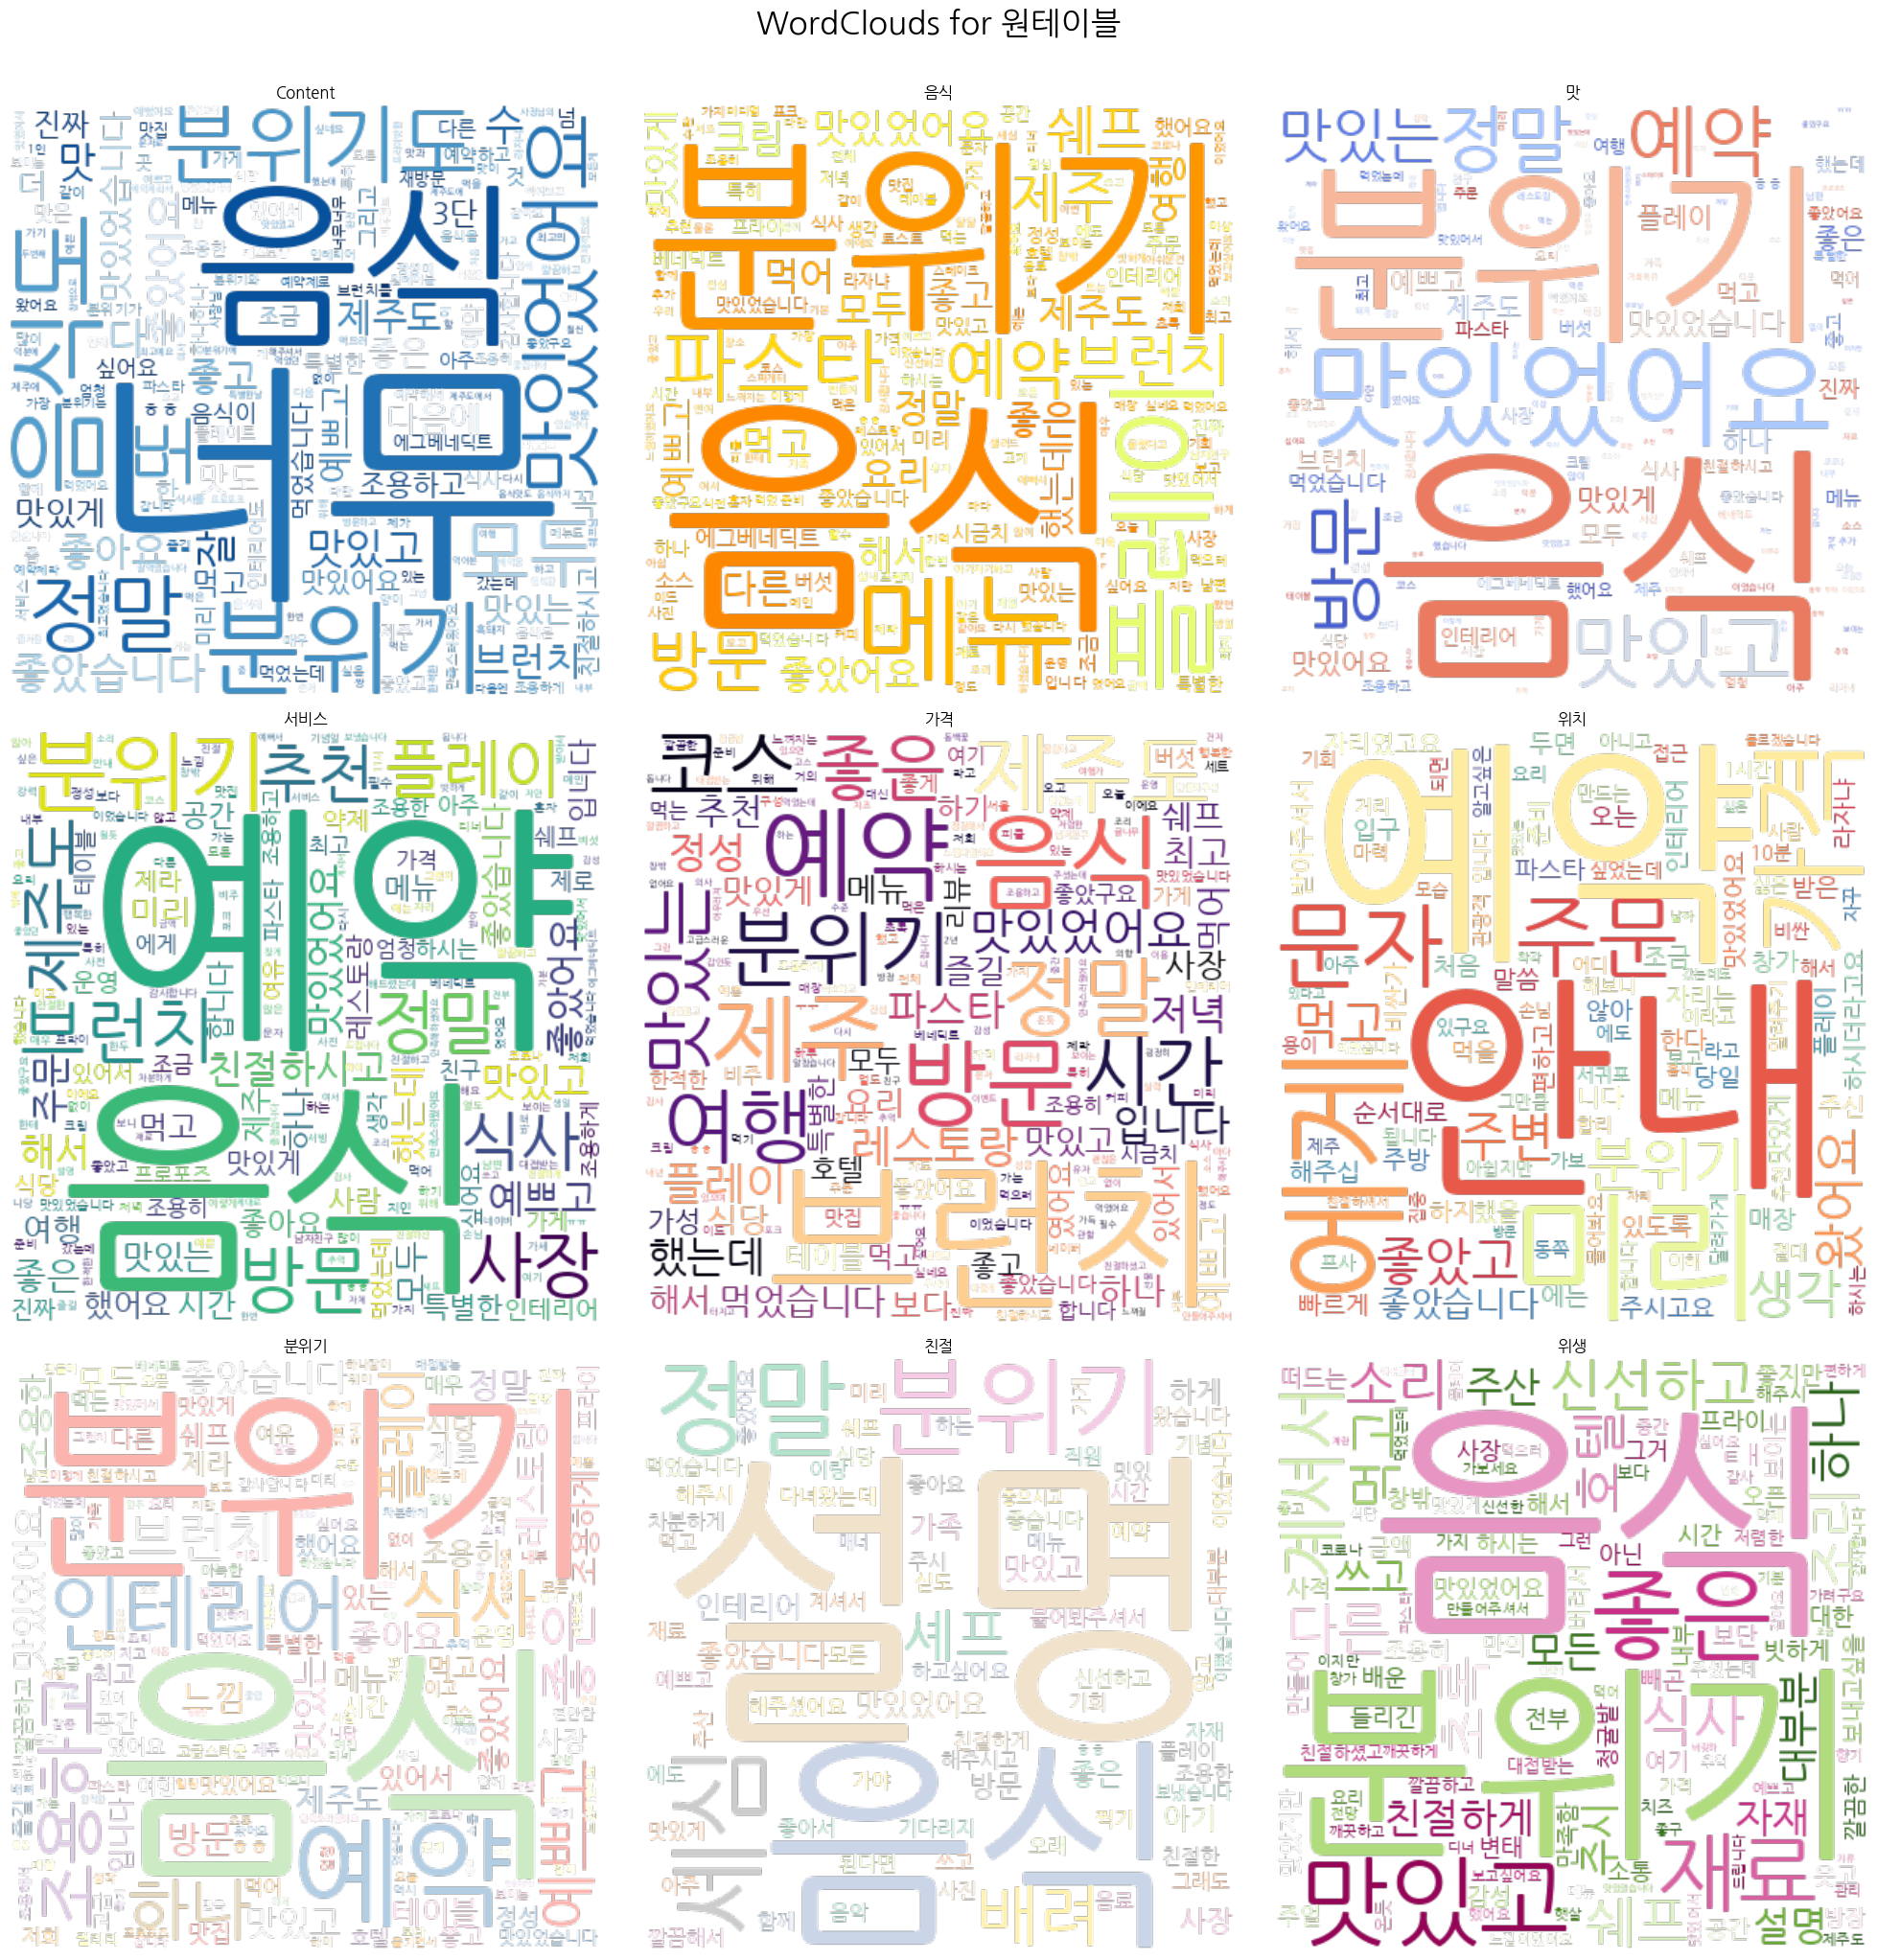

In [ ]:
# @title
# 데이터셋 불러오기
dataset_name = dataset_map.get(지명)
if not dataset_name:
    raise ValueError(f"'{지명}'에 해당하는 데이터셋이 없습니다.")
dataset = load_dataset(dataset_name)
df = dataset['train'].to_pandas()

# 가게명 입력받기
store_name = 가게이름

# 입력받은 가게명에 해당하는 데이터만 선택
df_store = df[df['Name'] == store_name]

# 한글 폰트 설정 (NanumGothic 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

# 색상 팔레트 지정
color_palettes = [
    "Blues", "Wistia", "coolwarm", "viridis", "magma", "Spectral", "Pastel1", "Pastel2", "PiYG"
]

# 각 컬럼에 대한 워드클라우드 생성 및 출력
plt.figure(figsize=(20, 20))
for idx, column in enumerate(['Content','음식', '맛', '서비스', '가격', '위치', '분위기', '친절', '위생']):
    text = ' '.join(df_store[column].dropna().map(str))
    if text.strip():
        try:
            wordcloud = WordCloud(
                font_path=font_path,
                mode='RGBA',
                background_color=None,
                width=400,
                height=400,
                colormap=color_palettes[idx % len(color_palettes)],
                contour_width=1,
                contour_color='black',
                collocations=False
            ).generate(text)
            plt.subplot(3, 3, idx+1)
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'{column}')
        except ValueError:
            print(f"No words to generate WordCloud for {column} in {store_name}")
    else:
        print(f"No text for {column} in {store_name}")

plt.suptitle(f'WordClouds for {store_name}', fontsize=24, y=1.02)  # y 값을 조정
plt.tight_layout()
plt.subplots_adjust(top=0.97)  # 서브플롯 간의 간격 조정
plt.show()

# **Keyword Word Cloud**


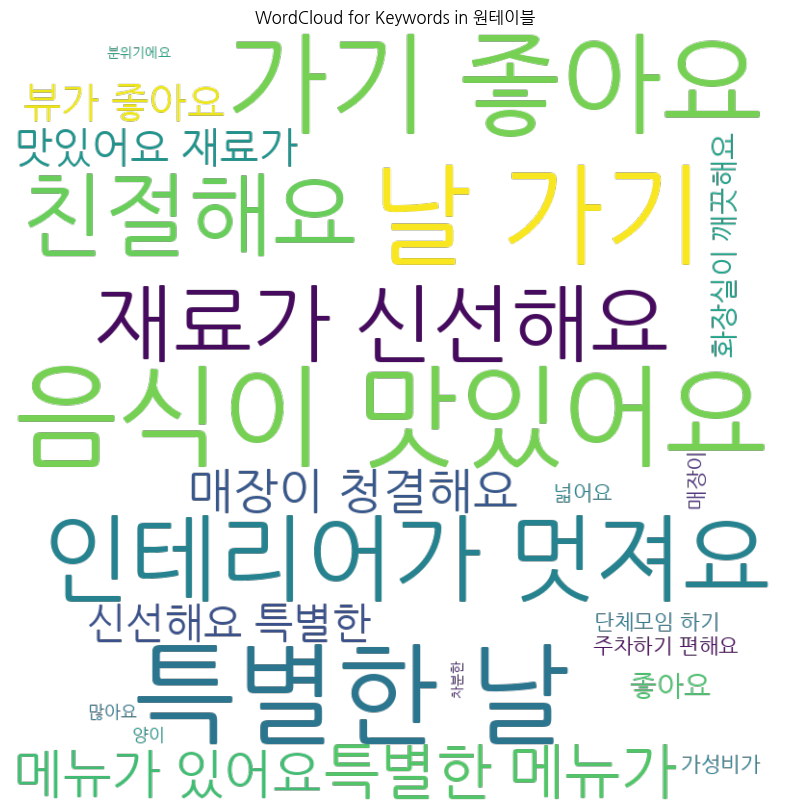

In [ ]:
# @title
# 매핑된 데이터셋 불러오기
dataset_name = dataset_map.get(지명)
if not dataset_name:
    raise ValueError(f"'{지명}'에 해당하는 데이터셋이 없습니다.")
dataset = load_dataset(dataset_name)
df = dataset['train'].to_pandas()


# 가게명 입력받기
store_name = 가게이름

# 입력받은 가게명에 해당하는 데이터만 선택
df_store = df[df['Name'] == store_name]

# 한글 폰트 설정 (NanumGothic 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

# df['Keywords'] 컬럼의 데이터를 파싱하여 실제 키워드만 추출
keywords = df_store['Keywords'].dropna().apply(lambda x: ast.literal_eval(x))
all_keywords = ' '.join([keyword for sublist in keywords for keyword in sublist])

# 워드클라우드 생성 및 출력
if all_keywords.strip():  # 텍스트가 비어있지 않은 경우
    wordcloud = WordCloud(font_path=font_path, mode='RGBA', background_color=None, width=800, height=800).generate(all_keywords)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Keywords in {store_name}')
    plt.show()
else:
    print(f"{store_name} 가게의 키워드 Word Cloud")

# **Tree Map**

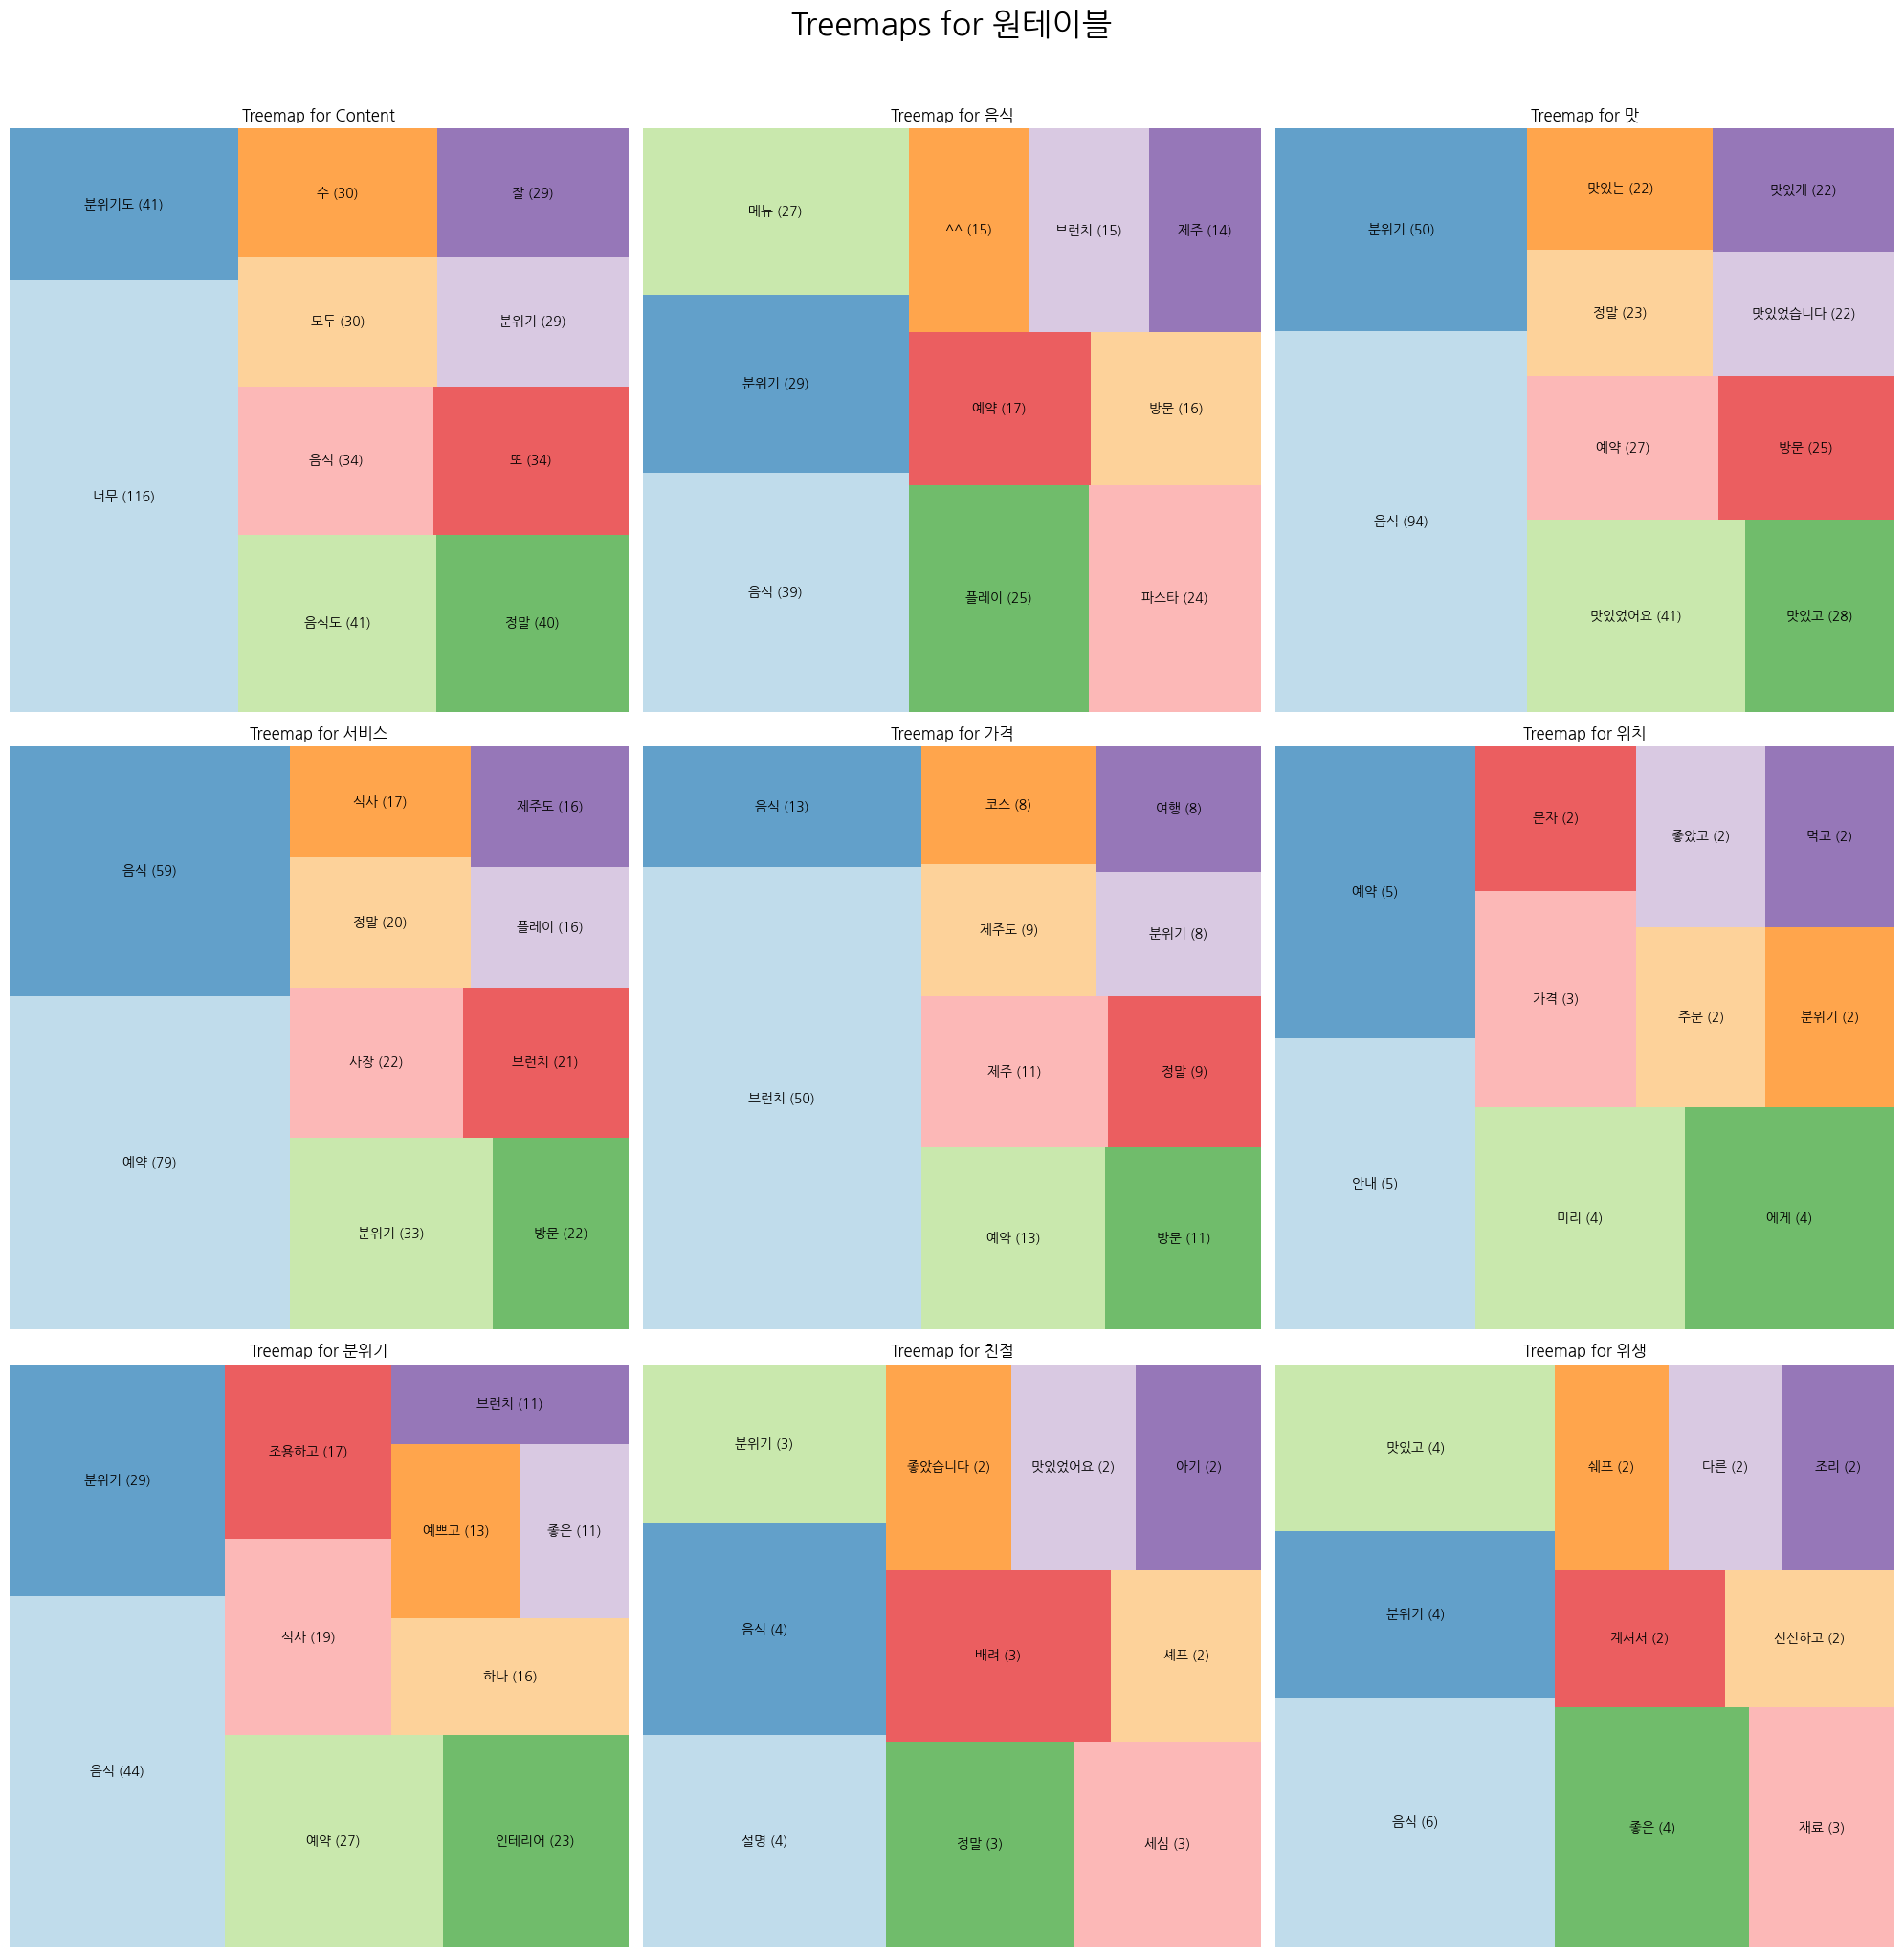

In [ ]:
# @title
# 매핑된 데이터셋 불러오기
dataset_name = dataset_map.get(지명)
if not dataset_name:
    raise ValueError(f"'{지명}'에 해당하는 데이터셋이 없습니다.")
dataset = load_dataset(dataset_name)
df = dataset['train'].to_pandas()


# 가게명 입력받기
store_name = 가게이름

# 입력받은 가게명에 해당하는 데이터만 선택
df_store = df[df['Name'] == store_name]

# 전체 그림의 크기 및 형태 설정
plt.figure(figsize=(20, 20))

# 각 컬럼에 대한 트리맵 생성 및 출력
for idx, column in enumerate(['Content', '음식', '맛', '서비스', '가격', '위치', '분위기', '친절', '위생']):
    plt.subplot(3, 3, idx+1)  # 3x3 형태로 출력
    text = ' '.join(df_store[column].dropna().map(str))  # NaN 값을 제거하고 모든 값을 문자열로 변환
    if text.strip():  # Check if text is not empty
        word_count = Counter(text.split())
        labels = [f"{word} ({count})" for word, count in word_count.most_common(10)]
        squarify.plot(sizes=[count for _, count in word_count.most_common(10)],
                      label=labels,
                      color=plt.cm.Paired.colors,
                      alpha=0.7)
        plt.axis('off')
        plt.title(f'Treemap for {column}')
    else:
        print(f"No words to generate Treemap for {column} in {store_name}")

plt.suptitle(f'Treemaps for {store_name}', fontsize=24, y=1.02)
plt.tight_layout()
plt.show()

# **Keyword Tree Map**

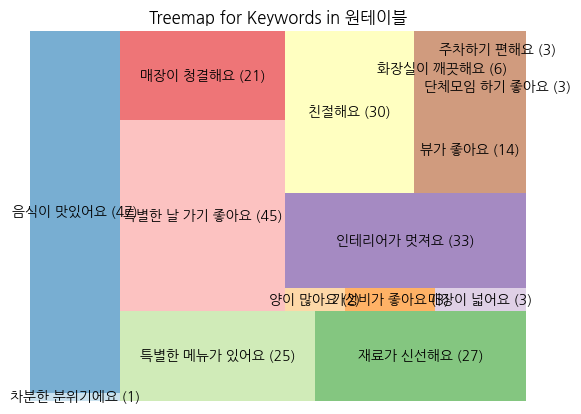

In [ ]:
# @title
# 매핑된 데이터셋 불러오기
dataset_name = dataset_map.get(지명)
if not dataset_name:
    raise ValueError(f"'{지명}'에 해당하는 데이터셋이 없습니다.")
dataset = load_dataset(dataset_name)
df = dataset['train'].to_pandas()

# 가게명 입력받기
store_name = 가게이름

# 입력받은 가게명에 해당하는 데이터만 선택
df_store = df[df['Name'] == store_name]

# df['Keywords'] 컬럼의 데이터를 파싱하여 실제 키워드만 추출
keywords = df_store['Keywords'].dropna().apply(lambda x: ast.literal_eval(x))
all_keywords = [keyword for sublist in keywords for keyword in sublist]

# 키워드의 빈도수를 계산
word_counts = {}
for word in all_keywords:
    word = word.strip(',').strip()  # 쉼표와 공백 제거
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# 트리맵을 그림
labels = [f"{k} ({v})" for k, v in word_counts.items()]
colors = plt.cm.Paired(range(len(word_counts)))
squarify.plot(sizes=list(word_counts.values()), label=labels, color=colors, alpha=.6)
plt.title(f'Treemap for Keywords in {store_name}')
plt.axis('off')
plt.show()

# **LDA 토픽모델링**
토픽모델링 결과(csv, html은 좌측에 생성되어 있습니다.
다운로드해서 사용하세요)

In [ ]:
# @title
# 매핑된 데이터셋 불러오기
dataset_name = dataset_map.get(지명)
if not dataset_name:
    raise ValueError(f"'{지명}'에 해당하는 데이터셋이 없습니다.")
dataset = load_dataset(dataset_name)
df = dataset['train'].to_pandas()

# 가게명 입력받기
store_name = 가게이름

# 입력받은 가게명에 해당하는 데이터만 선택
df_restaurant = df[df['Name'] == store_name]

# 'Tokens' 컬럼의 값이 NaN이라면 빈 문자열로 대체합니다.
df_restaurant['Tokens'] = df_restaurant['Tokens'].apply(lambda x: x if pd.notnull(x) else '')

# 이제 토큰화를 진행합니다.
df_restaurant['Tokens'] = df_restaurant['Tokens'].apply(lambda x: x.split())

# 문서-단어 행렬을 생성합니다.
dictionary = corpora.Dictionary(df_restaurant['Tokens'])
corpus = [dictionary.doc2bow(text) for text in df_restaurant['Tokens']]

# LDA 모델을 훈련합니다.
num_topics = 10  # 원하는 토픽의 수를 설정
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# 각 문서의 토픽 분포를 저장합니다.
df_restaurant['Topic_Distribution'] = df_restaurant['Tokens'].apply(lambda x: lda_model[dictionary.doc2bow(x)])

# pyLDAvis를 이용해 토픽 모델링 결과를 시각화합니다.
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis_data, f'{store_name}_lda.html')

# 각 토픽의 단어 분포와 함께 저장합니다.
topic_word_distribution = [lda_model.show_topic(i) for i in range(num_topics)]
for i in range(num_topics):
    topic_words = [word for word, _ in topic_word_distribution[i]]
    df_restaurant[f'Topic_{i}_Words'] = pd.Series(topic_words)

# 결과를 저장합니다.
df_restaurant.to_csv(f'{store_name}_토픽모델링_결과.csv', index=False)

# 결과 출력
for i in range(num_topics):
    print(f"Topic {i}'s word distribution: {topic_word_distribution[i]}")

Topic 0's word distribution: [('예약,', 0.015486189), ('분위기,', 0.014773029), ('방문,', 0.013944204), ('브런치,', 0.012252664), ('맛있게,', 0.011731948), ('먹고,', 0.008713604), ('플레이,', 0.0072624106), ('음식,', 0.00705849), ('식사,', 0.007057797), ('파스타,', 0.007057607)]
Topic 1's word distribution: [('예약,', 0.011152097), ('모두,', 0.010922087), ('분위기,', 0.010529849), ('먹고,', 0.009346522), ('조금,', 0.007494536), ('좋은,', 0.007494016), ('브런치,', 0.005673137), ('..,', 0.005668848), ('친절하시고,', 0.0056669223), ('아주,', 0.005666618)]
Topic 2's word distribution: [('하나,', 0.0292951), ('음식,', 0.029241895), ('분위기,', 0.023145821), ('맛있었어요', 0.013672815), ('예약,', 0.012447609), ('정말,', 0.010962174), ('예쁘고,', 0.009448869), ('플레이,', 0.009388014), ('방문,', 0.008686989), ('맛있고,', 0.0074126744)]
Topic 3's word distribution: [('분위기,', 0.020116374), ('음식,', 0.020001167), ('맛있었습니다,', 0.010005714), ('좋은,', 0.009835104), ('생각,', 0.009832593), ('좋았습니다,', 0.008447972), ('제주,', 0.008446251), ('예약,', 0.0072585247), ('메뉴,', 0.007060443

# **네트워크 분석**
min_freq를 조절하여 네트워크 분석의 노드(가지) 수를 조절.

출력결과(원의 개수)를 늘리고 싶으면 숫자를 낮추고,
줄이고 싶으면 숫자를 높이면 됩니다.

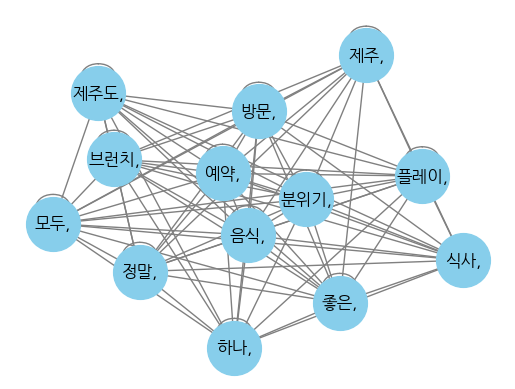

In [ ]:
# 매핑된 데이터셋 불러오기
dataset_name = dataset_map.get(지명)
if not dataset_name:
    raise ValueError(f"'{지명}'에 해당하는 데이터셋이 없습니다.")
dataset = load_dataset(dataset_name)
df = dataset['train'].to_pandas()


# 가게명 입력받기
store_name = 가게이름

# 입력받은 가게명에 해당하는 데이터만 선택
store_df = df[df['Name'] == store_name].copy()  # .copy()를 사용하여 원본 df에 영향을 주지 않게 합니다.

# 한글 폰트 설정 (NanumGothic 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

# 'Tokens' 컬럼의 NULL 또는 NaN 값을 빈 리스트로 채우기
store_df['Tokens'].fillna(value='', inplace=True)


# 'Tokens' 컬럼의 값을 문자열로 변환
store_df['Tokens'] = store_df['Tokens'].astype(str)

# 문자열 형태의 리스트를 실제 리스트로 변환
store_df['Tokens'] = store_df['Tokens'].apply(lambda x: x.split())

# 단어 빈도 계산
word_freq = Counter(itertools.chain(*store_df['Tokens']))

# 빈도 임계값 설정
min_freq = "30" #@param {type:"string"}
min_freq = int(min_freq)  # 이 부분 추가

# 빈도를 기반으로 리뷰의 토큰 필터링 및 1글자 토큰 제외
store_df['Filtered_Tokens'] = store_df['Tokens'].apply(lambda tokens: [word for word in tokens if len(word) > 1 and word_freq[word] >= min_freq])

# 토큰의 공동 출현 빈도 계산
co_occurrence = defaultdict(int)
for tokens in store_df['Filtered_Tokens']:
    for pair in itertools.combinations(tokens, 2):  # 모든 조합의 쌍을 가져옵니다
        co_occurrence[tuple(sorted(pair))] += 1  # 카운트 증가

# 그래프 생성
G = nx.Graph()

for pair, freq in co_occurrence.items():
    word1, word2 = pair
    G.add_edge(word1, word2, weight=freq)

# 가중치가 임계값보다 작은 엣지를 제거
threshold = 0
for edge in list(G.edges()):
    if G.get_edge_data(*edge)['weight'] < threshold:
        G.remove_edge(*edge)

# 독립된 노드 (엣지가 없는) 제거
G.remove_nodes_from(list(nx.isolates(G)))

# 네트워크 그리기
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1500)
nx.draw_networkx_edges(G, pos, edge_color='grey')
nx.draw_networkx_labels(G, pos, font_size=12, font_family=font)

plt.axis('off')
plt.show()

# **MCA 다중분석**

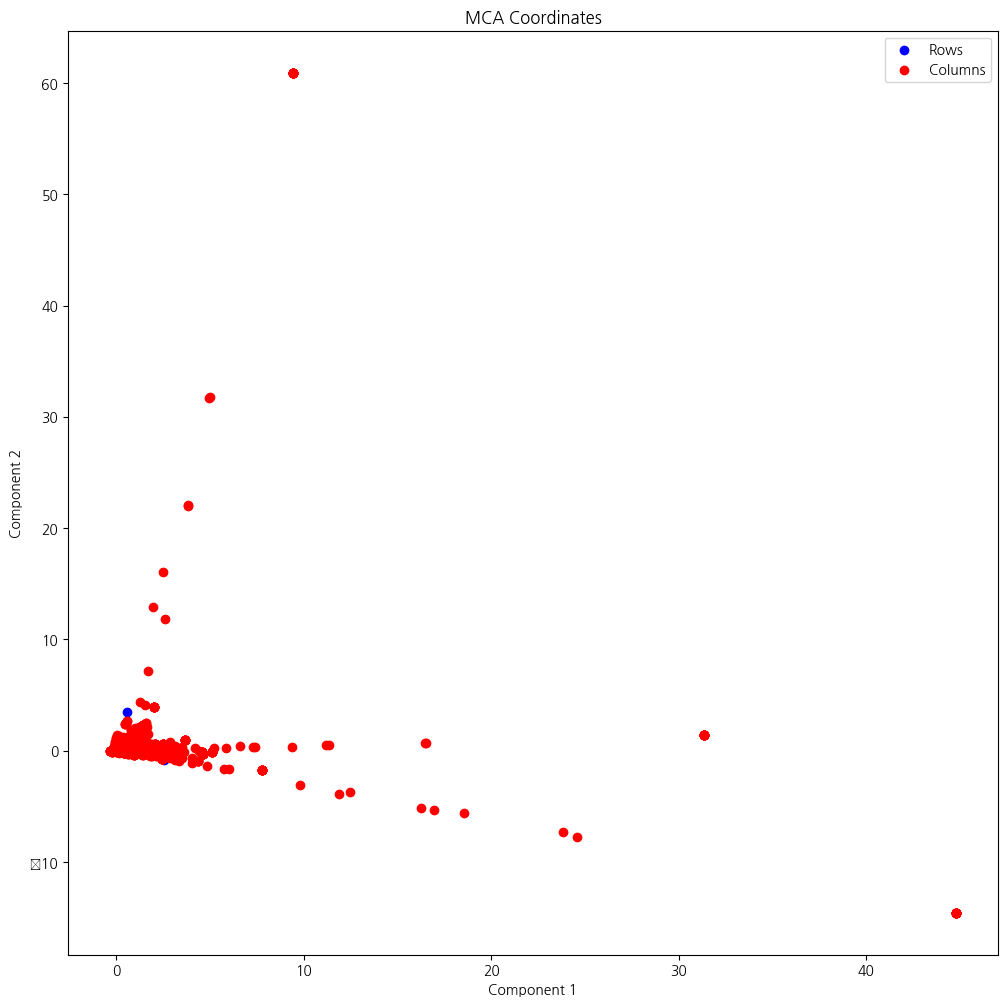

In [ ]:
# @title
# 매핑된 데이터셋 불러오기
dataset_name = dataset_map.get(지명)
if not dataset_name:
    raise ValueError(f"'{지명}'에 해당하는 데이터셋이 없습니다.")
dataset = load_dataset(dataset_name)
df = dataset['train'].to_pandas()

# 가게명 입력받기
store_name = 가게이름

# 입력받은 가게명에 해당하는 데이터만 선택
df_store = df[df['Name'] == store_name]

# 한글 폰트 설정 (NanumGothic 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

# "Nouns" 컬럼의 텍스트 데이터를 분리
nouns_list = df['Nouns'].str.split().dropna().tolist()

# MultiLabelBinarizer를 사용하여 one-hot encoding 수행
mlb = MultiLabelBinarizer(sparse_output=True)  # sparse matrix로 출력 설정
nouns_encoded = mlb.fit_transform(nouns_list)

# MultiLabelBinarizer로 인코딩한 데이터를 dense pandas DataFrame으로 변환
nouns_df = pd.DataFrame(nouns_encoded.toarray(), columns=mlb.classes_)

# MCA 수행
mca = prince.MCA()
mca_results = mca.fit(nouns_df)

# 결과 데이터 얻기
row_coords = mca_results.row_coordinates(nouns_df)
col_coords = mca_results.column_coordinates(nouns_df)

# 결과 시각화
plt.figure(figsize=(12, 12))
plt.scatter(row_coords[0], row_coords[1], color='blue', label='Rows')
plt.scatter(col_coords[0], col_coords[1], color='red', label='Columns')
plt.title('MCA Coordinates')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

# **감성분석**

0.00점은 해당 키워드에 리뷰가 없음을 뜻합니다.

In [ ]:
# @title
# Initialize the sentiment analysis model
classifier = pipeline("sentiment-analysis", model="matthewburke/korean_sentiment")

# 매핑된 데이터셋 불러오기
dataset_name = dataset_map.get(지명)
if not dataset_name:
    raise ValueError(f"'{지명}'에 해당하는 데이터셋이 없습니다.")
dataset = load_dataset(dataset_name)
df = dataset['train'].to_pandas()

# 가게명 입력받기
store_name = 가게이름

# 입력받은 가게명에 해당하는 데이터만 선택
df_store = df[df['Name'] == store_name]

#키워드를 네이버키워드로 변경하는것이 좋을듯하오
keywords = {
    '음식': ['푸짐','신선', '싱싱','재료','메뉴', '요리', '재료', '포션', '신선도', '플레이팅', '디저트', '스타터', '주류', '음료', '다양성', '원산지', '조리방법', '고기', '해산물', '채소', '소스', '특색', '원물', '조미료','가락지빵', '가래떡', '가루우유', '가지나물', '간고등어', '간장', '갈비', '갈비탕', '감자튀기', '감자튀김', '강냉이', '강정', '개떡', '개장', '건빵', '겨울냉면', '경편', '계란', '계란덮밥', '계란말이', '고기', '고기겹빵', '고량소주', '고량주', '고로케', '고추가루', '고추장', '고춧가루', '곤밥', '골동반', '곰국', '공갈빵', '과자', '광동요리', '구멍국수', '구야시', '국물', '국밥', '국수', '국수발', '국수오리', '국숫발', '규돈', '기름밥', '기름사탕', '김밥', '김초밥', '김치', '김치찌개', '까까', '깍두기', '깨소금', '껌', '꼬부랑국수', '꿀', '꿀타래', '꿔바로우', '나박김치', '날김치', '날달걀', '날맥주', '냉라면', '냉면', '녹차', '다코야키', '단디', '단맛감', '단무지', '단물얼음', '단얼음', '달걀', '달걀덮밥', '달걀말이', '닭갈비', '닭강정', '닭개장', '닭고기', '닭고기덮밥', '닭꼬치', '닭튀김', '대굿국', '덮밥', '도넛', '도미빵', '돈가스', '동치미', '돼지고기', '돼지고기덮밥', '된장', '된장찌개', '두부', '디저트', '땅콩과자', '떡', '떡국', '떡꼬치', '떡볶이', '뜨더국', '라면', '라면떡볶이', '라면수프', '라바슈', '라볶이', '레모네이드', '레몬수', '마가린', '마른반찬', '마른오징어', '마멀레이드', '마요네즈', '마카로니', '마파두부', '막걸리', '막대사탕', '만두', '만두기', '맘마', '맥주', '머스터드', '머스터드소스', '먹거리', '면발', '묵', '문어빵', '물냉면', '미숫가루', '미음', '밀가루', '밀국수', '밀크커피', '바게트', '바비큐', '바삭과자', '박고지', '박하사탕', '반미', '밥감주', '배추김치', '배춧국', '백설탕', '백엽다', '백포도주', '버터', '보드카', '보르시', '보리밥', '보리차', '보릿가루', '보신탕', '보쌈김치', '볶음밥', '부대찌개', '부침개', '분유', '분탕', '불고기', '붕어빵', '브랜디', '블랙커피', '비빔', '비빔냉면', '비빔밥', '빙수', '빠다', '빵', '삐짜', '사이다', '사탕', '사탕가루', '삶은달걀', '삼각김밥', '삼겹살', '삼계탕', '삼두음', '삼정과', '삼합미음', '새우젓', '새우튀김', '샌드위치', '샐러드', '생강주', '생강즙', '생강차', '생김치', '생라면', '생맥주', '생선묵', '생선전', '생선회', '생황장', '샤실리크', '샴팡', '샴페인', '설고', '설고빵', '설기과자', '설기빵', '설탕', '셔벗', '셰이크', '소갈비', '소고기덮밥', '소금', '소만두', '소맥', '소면', '소불고기', '소시지', '소젖', '소주', '손자장', '손짜장', '송편', '송화다식', '송화밀수', '쇠고기', '쇠고기덮밥', '수란', '수타 자장', '수타 자장면', '수프', '순대', '순두부찌개', '스빠게띠', '스시', '스테이크', '스파게티', '시리얼', '식빵', '식초', '식품', '식혜', '쌀떡', '쌀라드', '쌘드위치', '썩장', '아욱국', '아이스커피', '아이스크림', '알찌개', '알코올음료', '알탕', '압생트', '애기젖가루', '애피타이저', '에피타이저', '야구르트', '약과', '양갱', '양고기', '양로쵈', '양식', '양장피', '어묵', '얼럭밥', '얼음과자', '얼음보숭이', '에스프레소', '여름냉면', '염소젖', '염장', '오니기리', '오렌지주스', '오르되브르', '오리알', '오미자차', '오색경단', '오야코동', '오징어덮밥', '오크로시카', '옥수수빵', '올리브유', '와사비', '와인', '왜간장', '요구르트', '우동', '우유', '위스키', '유부', '육개장', '육회', '음료', '이크라', '인삼차', '인절미', '일식', '자장', '자장면', '잡채', '잡탕밥', '장어덮밥', '적포도주', '젓갈', '젖가공품', '조미료', '조식', '주먹밥', '주스', '중식', '쥐치포', '쥐포', '즉석요리', '지지개', '짜장', '짜장면', '짬뽕', '쫄면', '찌개', '찐빵', '찰밥', '청국장', '초밥', '초콜릿', '총각김치', '추탕', '치즈', '치킨', '카레', '카스텔라', '칵테일', '칼국', '칼국수', '캐비어', '커피', '컵라면', '케이크', '케첩', '코코아', '콘브레드', '콘플레이크', '콜라', '콩국수', '콩밥', '콩우유', '콩자반', '쿠키', '크래커', '크루아상', '크림', '크림빵', '크림수프', '타래떡', '타이야키', '탕수육', '토스트', '통구이', '통닭', '튀김', '트르들로', '파김치', '파메산', '파스타', '파이', '파전', '팔보채', '팬케이크', '펠메니', '평양냉면', '포도주', '폭탄주', '푸딩', '푸른차', '풍선껌', '프라이', '프라이드치킨', '프렌치프라이', '플로프', '피자', '피짜', '필래프', '한식', '함박스테이크', '핫도그', '햄버거', '햄버거스테이크', '햄버그스테이크', '허니머스터드소스', '호떡', '홍차', '회', '회덮밥', '후무스', '후식', '훔무스', '흑맥주', '흑설탕', '희아리'],
    '맛': ['맛있', '달콤한', '짠맛', '쓴맛', '매운맛', '신맛', '깊은맛', '담백한', '풍미', '향', '조화롭다', '깔끔한', '무난한', '독특한', '고소한', '탱글탱글한', '부드러운', '촉촉한', '쫀득한', '바삭한', '느끼한'],
    '서비스': ['응대', '빠르', '지연', '프로페셔널', '친절', '불친절', '주문', '음식배달', '음식설명', '추천', '반응', '관리', '피드백', '웨이터', '웨이트리스', '주방장', '요리사', '서빙', '대기', '예약', '알바', '사장', '웨이팅'],
    '가격': ['돈', '비싸', '저렴', '가성비', '할인', '프로모션', '가격대', '과금', '무료', '추가요금', '팁', '세트', '커플', '코스', '단품', '메뉴판', '가격정책', '런치', '쿠폰', '가격표시', '추가요청'],
    '위치': ['주차', '지하철', '접근', '중심', '주변', '관광', '주소', '거리', '안내', '지도', '가까', '멀', '교통', '주차비', '걸어', '시설', '표지판', '버스', '택시', '대중교통'],
    '분위기': ['조용', '시끄', '로맨틱', '아늑', '트렌디', '전통', '현대', '데이트','모임', '편안', '고급', '캐주얼', '갤러리', '컨셉', '디자인', '인테리어', '배경음악', '빈티지', '오픈', '힙한', '느낌'],
    '친절': ['유쾌', '정중', '냉담', '즉각', '다정', '다감', '배려', '대화', '설명', '무관심', '존중', '기다리', '미소', '전문', '정직', '접객'],
    '위생': ['신선', '싱싱','깨끗', '오염', '바닥', '식기', '욕실', '조리', '쓰레기', '먼지', '청결', '공기', '손세정', '청소', '유통', '향기', '인증', '점검', '손씻']
}

# Add new columns
for keyword in keywords:
    df_store[keyword] = 0.0

# Define a function to get the sentiment
def get_sentiment(text):
    preds = classifier(text)
    return preds[0]['score'] if preds[0]['label'] == 'LABEL_1' else 1 - preds[0]['score']

if store_name in df_store['Name'].values:
    total_sentiments = []
    for keyword, related_words in keywords.items():
        sentences = nltk.tokenize.sent_tokenize(df_store[df_store['Name'] == store_name]['Content'].values[0])
        sentences = [sentence for sentence in sentences if any(word in sentence for word in related_words)]
        sentiments = [get_sentiment(sentence) for sentence in sentences]
        total_sentiments.extend(sentiments)
        avg_sentiment = sum(sentiments) / len(sentiments) if sentiments else 0
        df_store.loc[df_store['Name'] == store_name, keyword] = avg_sentiment

    overall_sentiment = sum(total_sentiments) / len(total_sentiments) if total_sentiments else 0

    file_name = store_name + "_감성분석_결과.csv"
    df_store.to_csv(file_name, index=False)

    print("Sentiment scores of {}: ".format(store_name))
    for keyword in keywords:
        score = df_store[df_store['Name'] == store_name][keyword].values[0]
        print("{}: {:.2f}점".format(keyword, score * 100))
    print("통합감성 점수: {:.2f}점".format(overall_sentiment * 100))
else:
    print("The store name does not exist in the dataframe.")


Sentiment scores of 원테이블: 
음식: 0.00점
맛: 97.30점
서비스: 97.30점
가격: 0.00점
위치: 0.00점
분위기: 0.00점
친절: 0.00점
위생: 0.00점
통합감성 점수: 97.30점


파란색: 긍정 키워드

빨간색: 부정 키워드

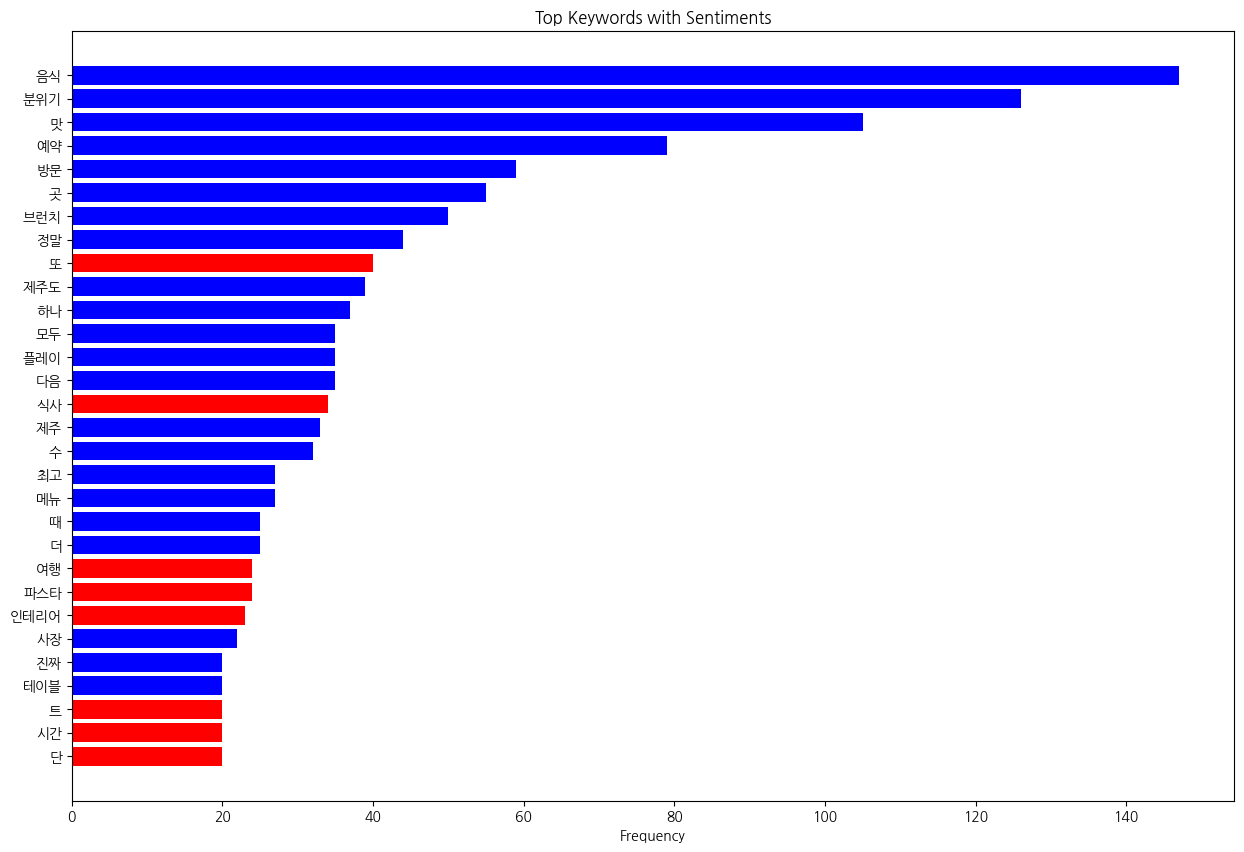

In [ ]:
# @title
# 매핑된 데이터셋 불러오기
dataset_name = dataset_map.get(지명)
if not dataset_name:
    raise ValueError(f"'{지명}'에 해당하는 데이터셋이 없습니다.")
dataset = load_dataset(dataset_name)
df = dataset['train'].to_pandas()

# 가게명 입력받기
store_name = 가게이름

# 입력받은 가게명에 해당하는 데이터만 선택
data = df[df['Name'] == store_name]

# 텍스트에서 명사 추출
def extract_nouns(texts):
    okt = Okt()
    all_nouns = []

    for text in texts:
        if isinstance(text, str):  # NaN 값 처리
            nouns = okt.nouns(text)
            all_nouns.extend(nouns)

    return all_nouns

nouns = extract_nouns(data['Content'])
top_nouns = Counter(nouns).most_common(30)

# Hugging Face의 감성분석 모델 사용
classifier = pipeline("text-classification", model="matthewburke/korean_sentiment")

def sentiment_analysis(token):
    preds = classifier(token, return_all_scores=True)
    is_positive = preds[0][1]['score'] > 0.5
    if is_positive:
        return "positive"
    else:
        return "negative"

sentiments = {token: sentiment_analysis(token) for token, _ in top_nouns}

# 시각화
colors = {
    "positive": "blue",
    "negative": "red"
}

tokens, frequencies = zip(*top_nouns)
token_colors = [colors[sentiments[token]] for token in tokens]

plt.figure(figsize=(15, 10))
plt.barh(tokens, frequencies, color=token_colors)
plt.xlabel('Frequency')
plt.title('Top Keywords with Sentiments')
plt.gca().invert_yaxis()
plt.show()

1에 가까울수록 긍정적 리뷰

0에 가까울수록 부정적 리뷰

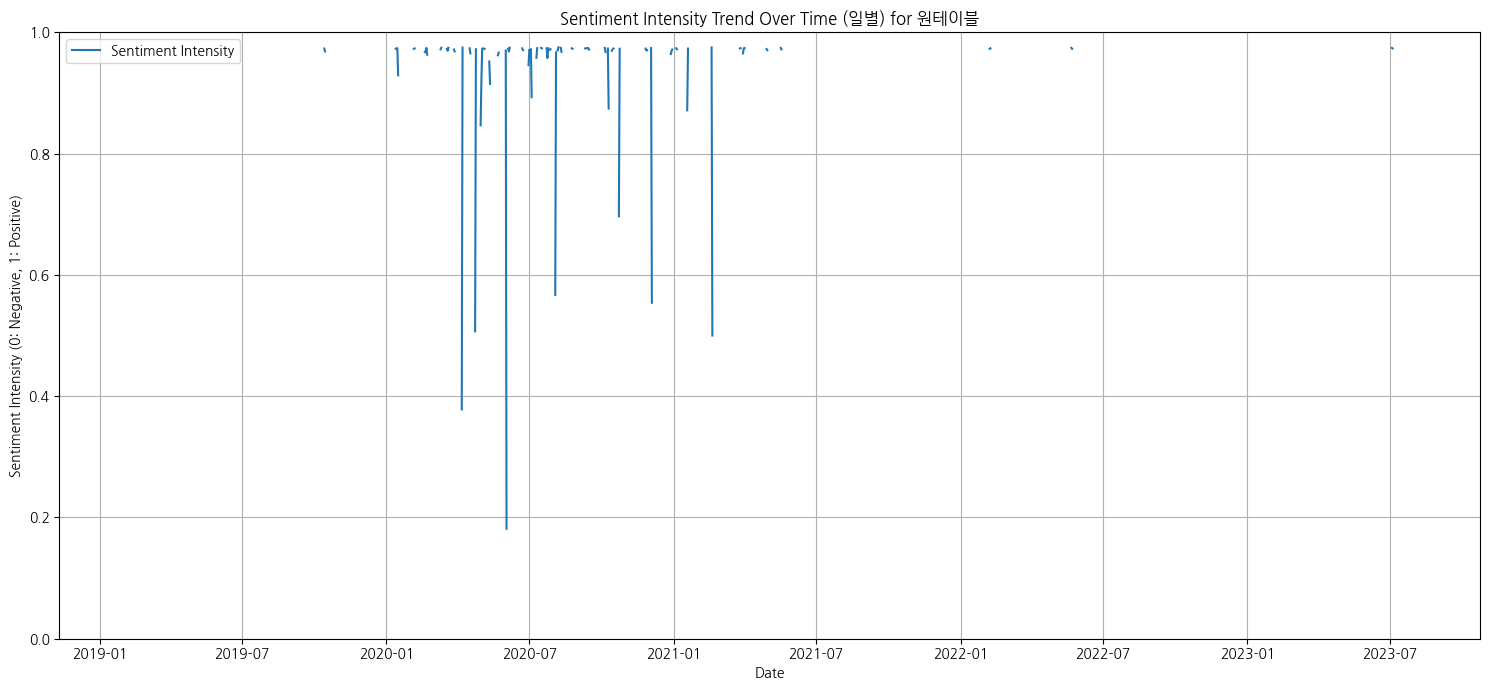

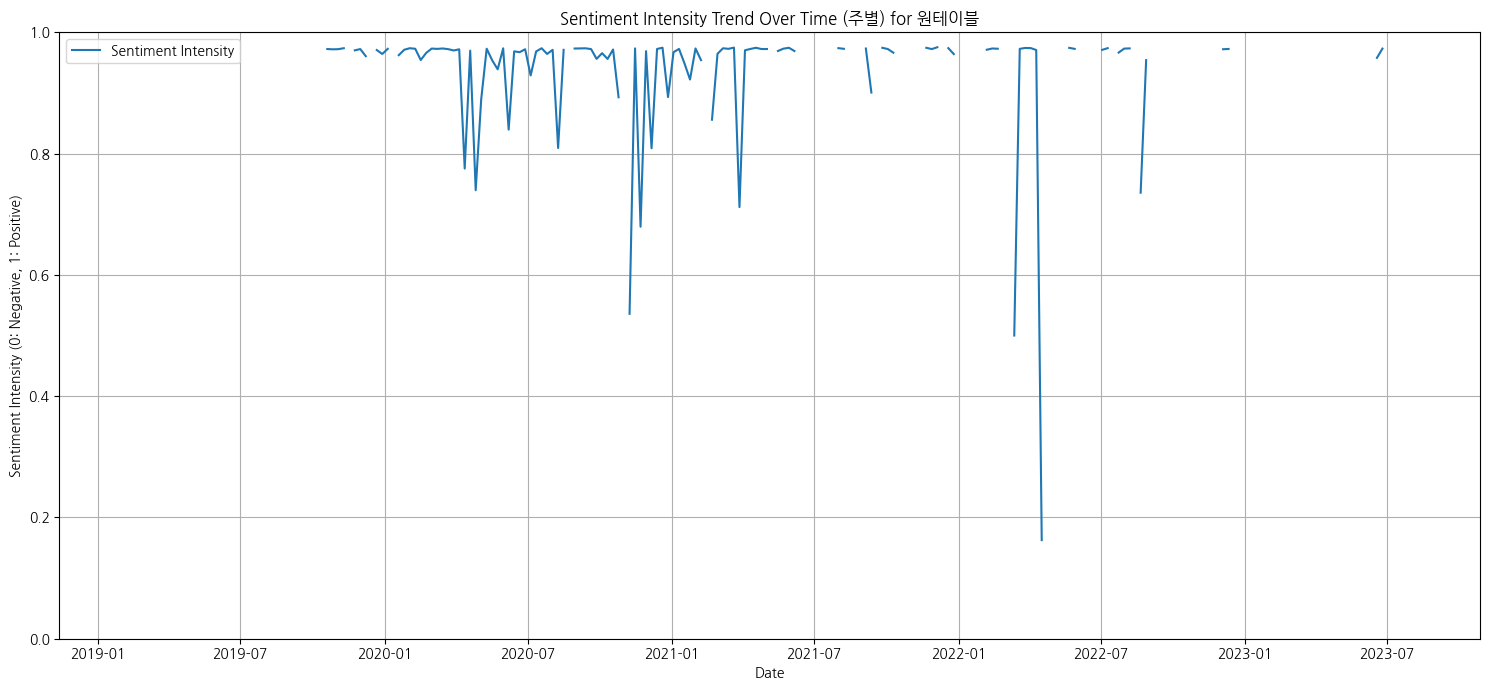

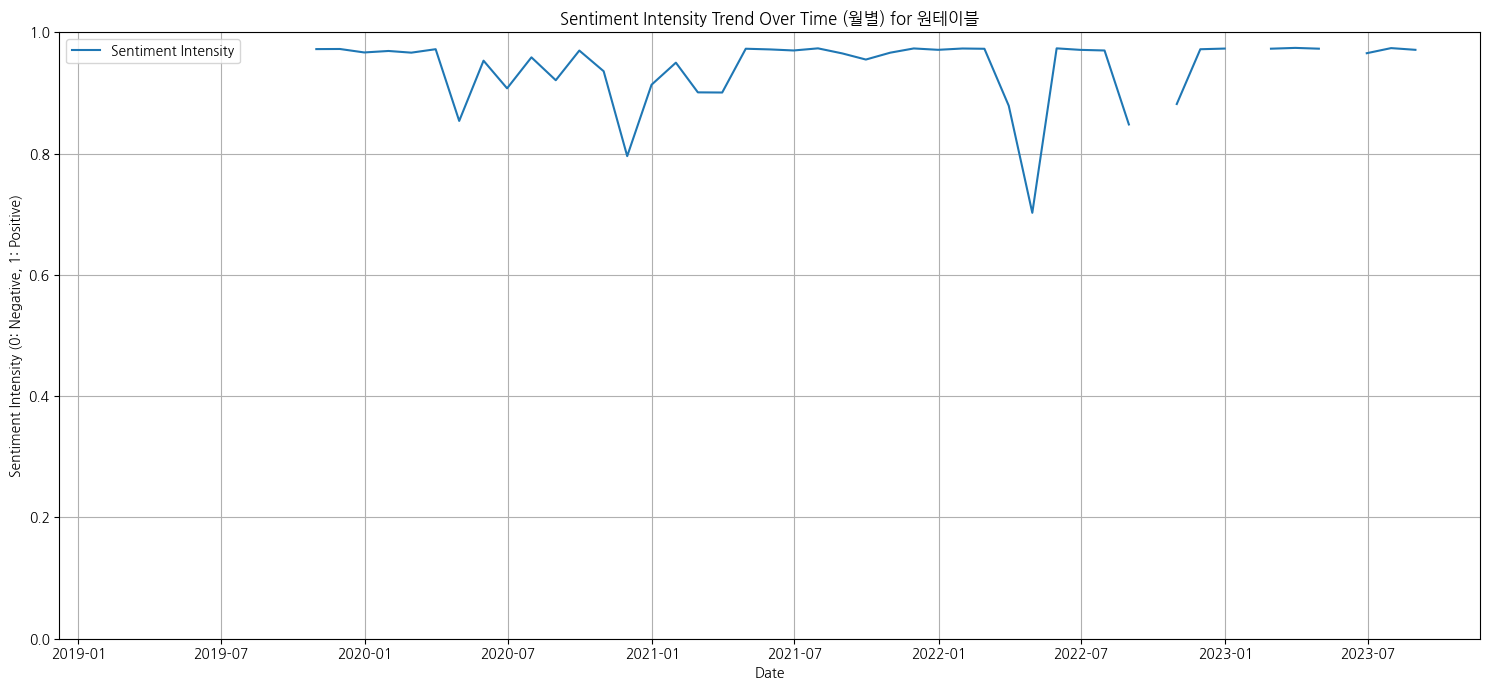

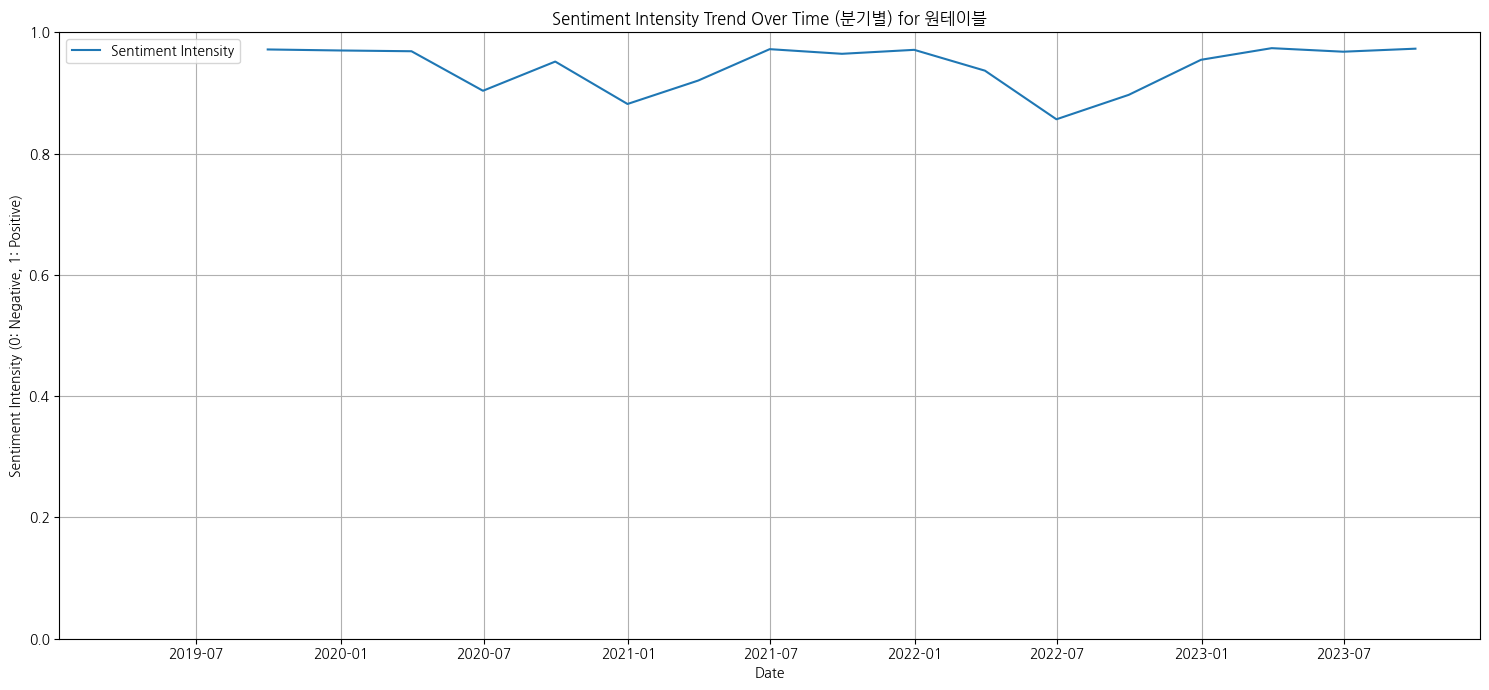

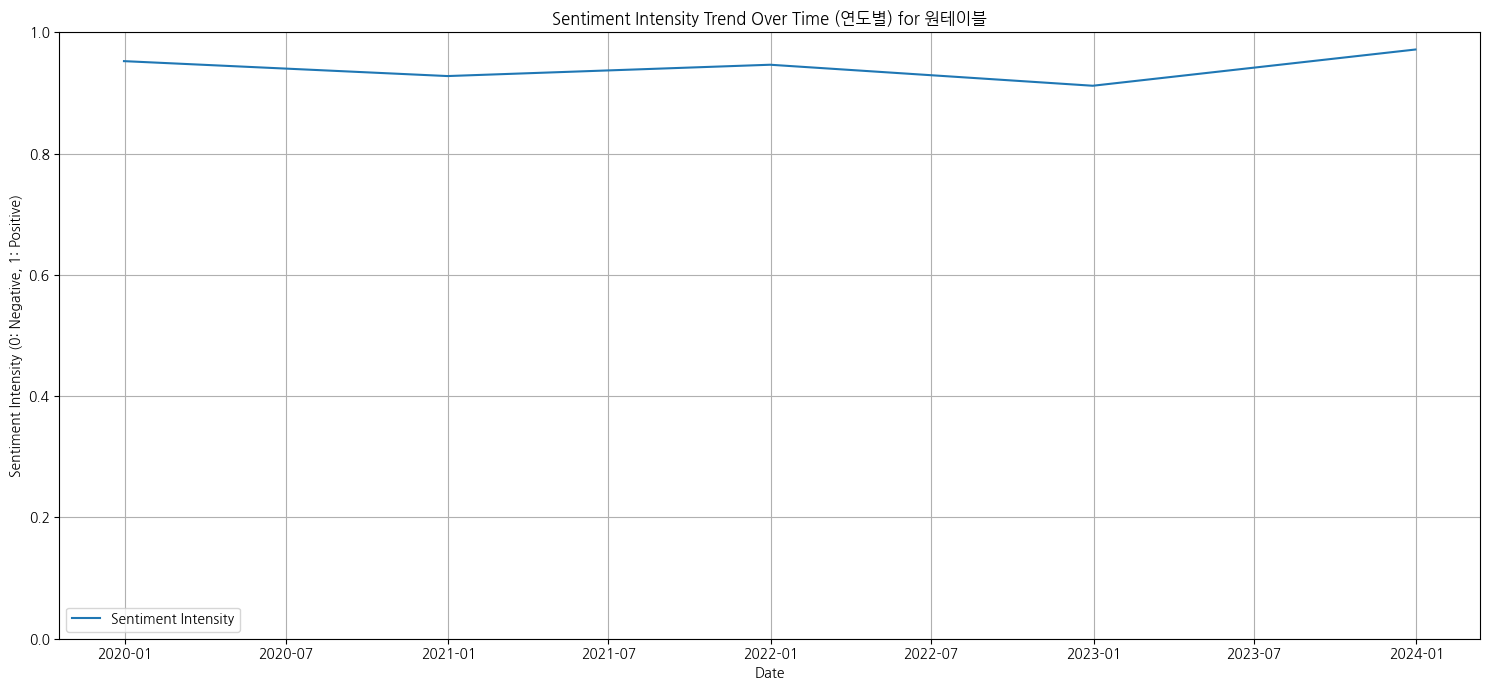

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

# 매핑된 데이터셋 불러오기
dataset_name = dataset_map.get(지명)
if not dataset_name:
    raise ValueError(f"'{지명}'에 해당하는 데이터셋이 없습니다.")
dataset = load_dataset(dataset_name)
df = dataset['train'].to_pandas()

# 가게명 입력받기
store_name = 가게이름

# 입력받은 가게명에 해당하는 데이터만 선택
data = df[df['Name'] == store_name]

# Hugging Face의 감성분석 모델 사용
classifier = pipeline("sentiment-analysis", model="matthewburke/korean_sentiment")

# 감성 강도 계산 함수
def get_sentiment_intensity(text):
    if not isinstance(text, str):  # NaN or None 값을 처리
        return 0.5  # 중립 값

    preds = classifier(text)
    return preds[0]['score'] if preds[0]['label'] == 'LABEL_1' else 1 - preds[0]['score']


# 각 리뷰에 대한 감성 강도 계산
data['Sentiment_Intensity'] = data['Content'].apply(get_sentiment_intensity)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 리샘플링 주기 설정
resample_periods = {
    '일별': 'D',
    '주별': 'W',
    '월별': 'M',
    '분기별': 'Q',
    '연도별': 'A'
}

# 각 주기별로 리샘플링 후 평균 감성 강도 시각화
for title, period in resample_periods.items():
    aggregated = data['Sentiment_Intensity'].resample(period).mean()

    plt.figure(figsize=(15, 7))
    plt.plot(aggregated.index, aggregated, label='Sentiment Intensity')
    plt.title(f'Sentiment Intensity Trend Over Time ({title}) for {store_name}')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Intensity (0: Negative, 1: Positive)')
    plt.ylim(0, 1)  # y축의 범위를 0부터 1로 설정
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

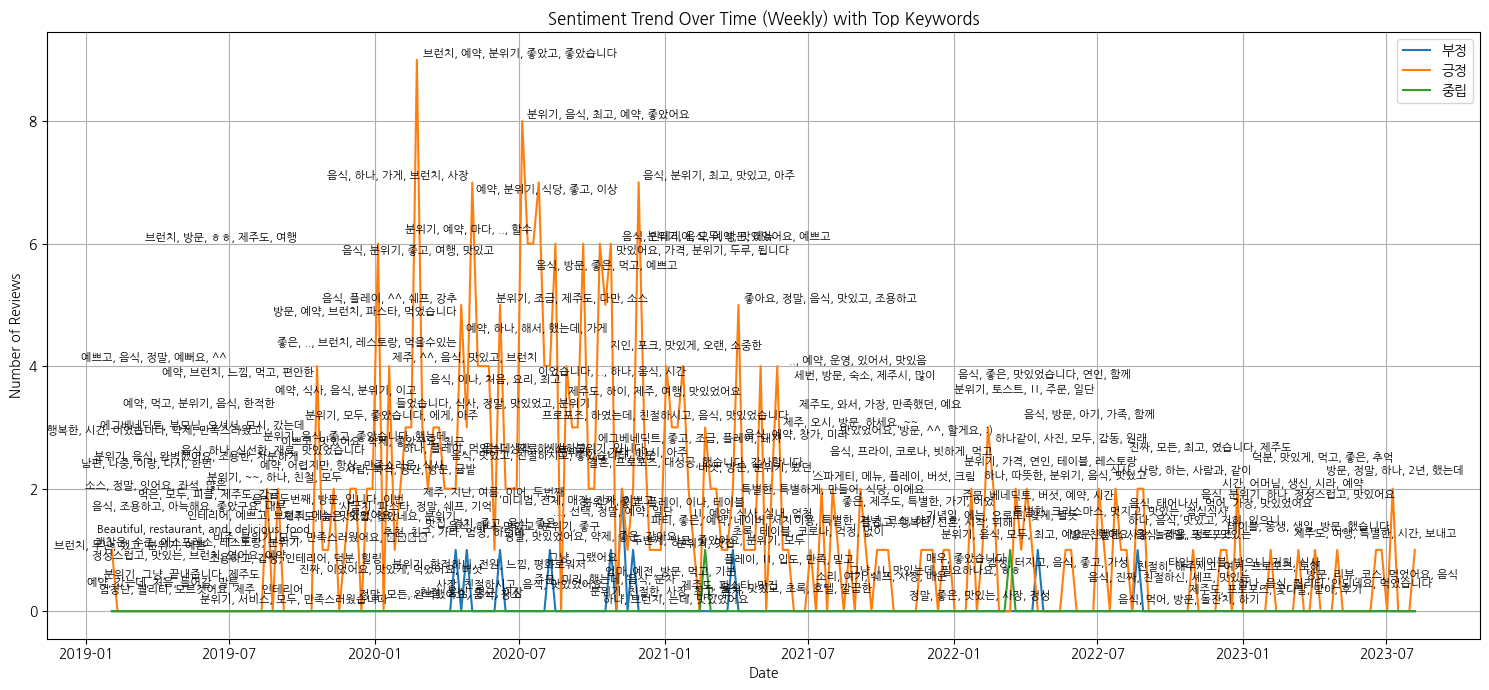

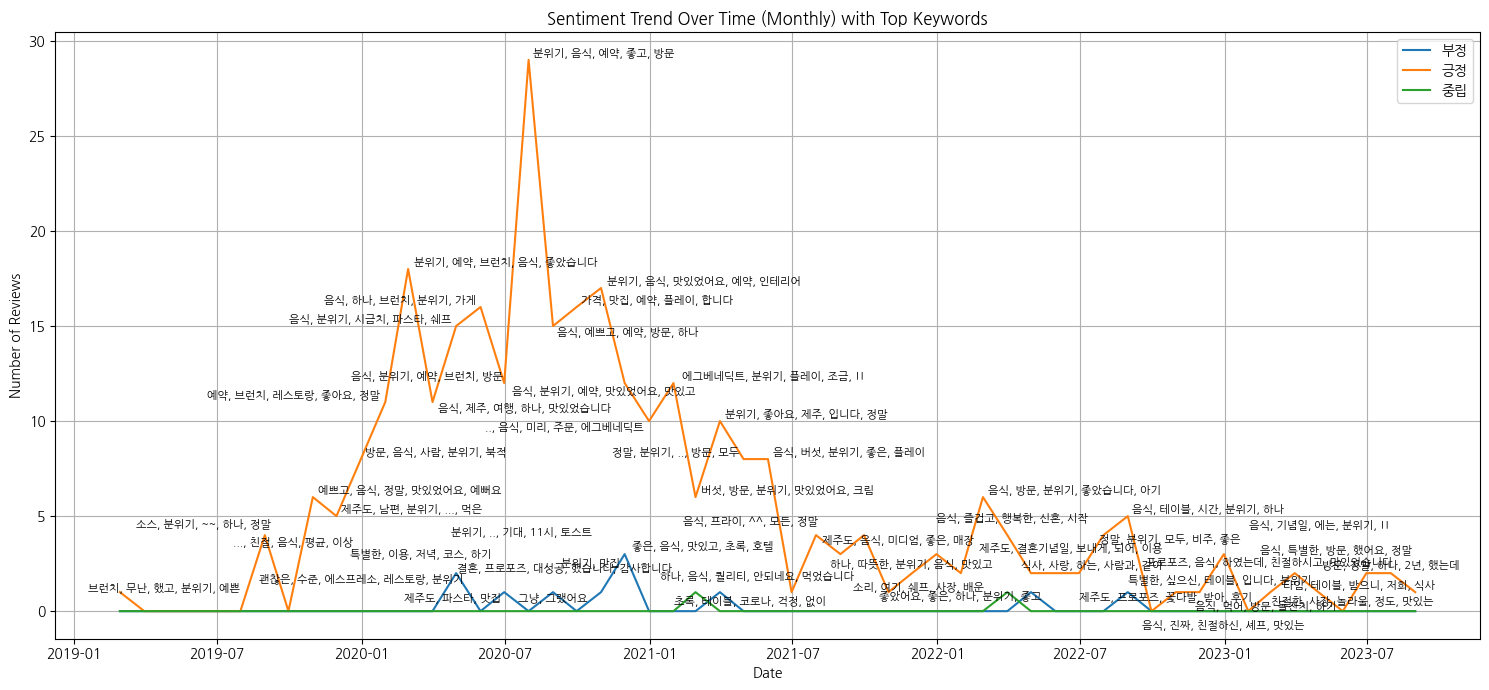

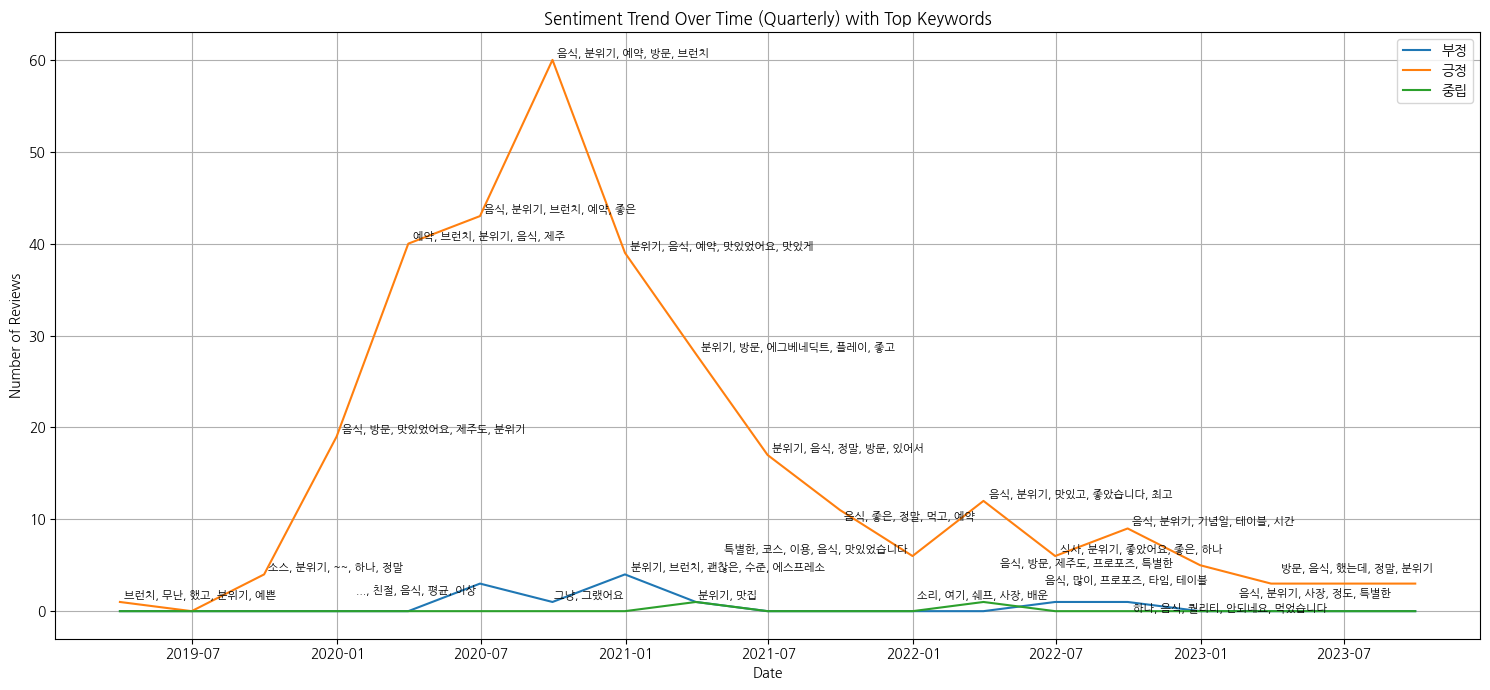

In [ ]:
# @title
# 매핑된 데이터셋 불러오기
dataset_name = dataset_map.get(지명)
if not dataset_name:
    raise ValueError(f"'{지명}'에 해당하는 데이터셋이 없습니다.")
dataset = load_dataset(dataset_name)
data = dataset['train'].to_pandas()

# 가게명 입력받기
store_name = 가게이름

# 입력받은 가게명에 해당하는 데이터만 선택
data = data[data['Name'] == store_name]

# 한글 폰트 설정 (NanumGothic 사용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

# Hugging Face의 감성분석 모델 사용
classifier = pipeline("sentiment-analysis", model="matthewburke/korean_sentiment")

# 감성분석 수행 함수
def get_sentiment(text):
    if not isinstance(text, str):  # NaN or None 값을 처리
        return 'neutral'

    result = classifier(text)
    return result[0]['label']

# 각 리뷰에 대한 감성분석 수행
data['Sentiment'] = data['Content'].apply(get_sentiment)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 리샘플링 주기 설정
resample_periods = {
    'Weekly': 'W',
    'Monthly': 'M',
    'Quarterly': 'Q'
}

# 주요 키워드 추출 함수
def extract_top_keywords(tokens_list, n=5):
    all_tokens = []
    for tokens in tokens_list:
        if isinstance(tokens, str):
            all_tokens.extend(tokens.split(', '))
    return [word for word, _ in Counter(all_tokens).most_common(n)]

# 각 주기별로 리샘플링 후 시각화
for title, period in resample_periods.items():
    texts = []  # For adjustText. 이를 for 문 내부로 옮깁니다.

    aggregated = data.groupby('Sentiment').resample(period).size().unstack(0).fillna(0)

    # 주요 키워드 추출
    keywords_aggregated_pos = data[data['Sentiment'] == 'LABEL_1']['Tokens'].resample(period).apply(extract_top_keywords)
    keywords_aggregated_neg = data[data['Sentiment'] == 'LABEL_0']['Tokens'].resample(period).apply(extract_top_keywords)

    plt.figure(figsize=(15, 7))
    sentiment_mapping = {'LABEL_0': '부정', 'LABEL_1': '긍정', 'neutral': '중립'}
    for sentiment in aggregated.columns:
        plt.plot(aggregated.index, aggregated[sentiment], label=sentiment_mapping[sentiment])

    # 주요 키워드 표시 (변경된 부분)
    for date, keywords in keywords_aggregated_pos.items():
        keyword_str = ', '.join(keywords)
        texts.append(plt.annotate(keyword_str, (date, aggregated.loc[date, 'LABEL_1']), fontsize=8, ha='center', va='bottom'))

    for date, keywords in keywords_aggregated_neg.items():
        keyword_str = ', '.join(keywords)
        texts.append(plt.annotate(keyword_str, (date, aggregated.loc[date, 'LABEL_0']), fontsize=8, ha='center', va='top'))

    adjust_text(texts)  # Adjust the texts so they don't overlap

    plt.title(f'Sentiment Trend Over Time ({title}) with Top Keywords')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()